In [2]:
# Importing the necessary libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [3]:
# Loading the data

data = pd.read_csv("fetal_health.csv")

## EDA

In [4]:
# Printing the first 10 rows of the data

data.head(10)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.000,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.000,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.000,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.000,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.000,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
5,134.0,0.001,0.0,0.010,0.009,0.0,0.002,26.0,5.9,0.0,...,50.0,200.0,5.0,3.0,76.0,107.0,107.0,170.0,0.0,3.0
6,134.0,0.001,0.0,0.013,0.008,0.0,0.003,29.0,6.3,0.0,...,50.0,200.0,6.0,3.0,71.0,107.0,106.0,215.0,0.0,3.0
7,122.0,0.000,0.0,0.000,0.000,0.0,0.000,83.0,0.5,6.0,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0
8,122.0,0.000,0.0,0.002,0.000,0.0,0.000,84.0,0.5,5.0,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0
9,122.0,0.000,0.0,0.003,0.000,0.0,0.000,86.0,0.3,6.0,...,62.0,130.0,1.0,0.0,122.0,122.0,123.0,1.0,1.0,3.0


In [5]:
# Printing the Columns of the dataset

data.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [6]:
# Shape of the dataset (Row, Column)

data.shape

(2126, 22)

In [7]:
# Statistical Insights of the data

data.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


In [8]:
# Basic info about each column 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [9]:
# Checking if any column contians null values

data.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


Text(0.5, 0.98, 'COUNT OF NON-NULL VALUES')

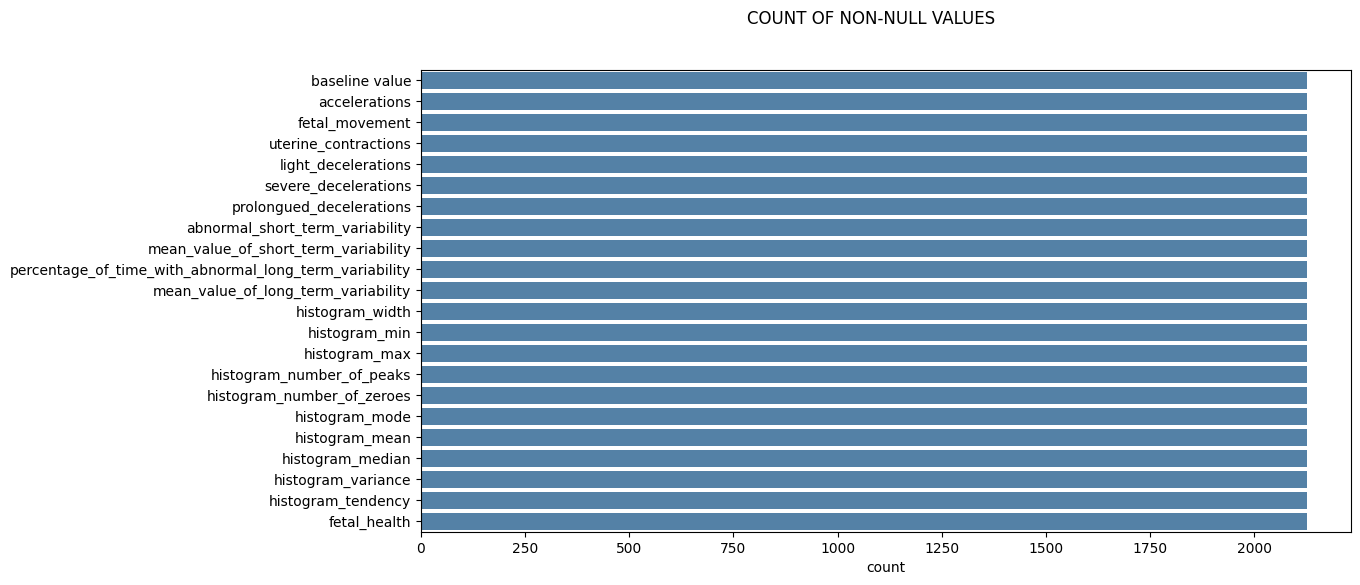

In [10]:
# Visualize if any column contains null values using countplot

plt.figure(figsize = (12, 6))

sns.countplot(data = data.iloc[0:], orient='h', color = 'steelblue')
plt.suptitle("COUNT OF NON-NULL VALUES")

In [11]:
# Count of each unique value of 'fetal_health'

print(data['fetal_health'].value_counts())

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64


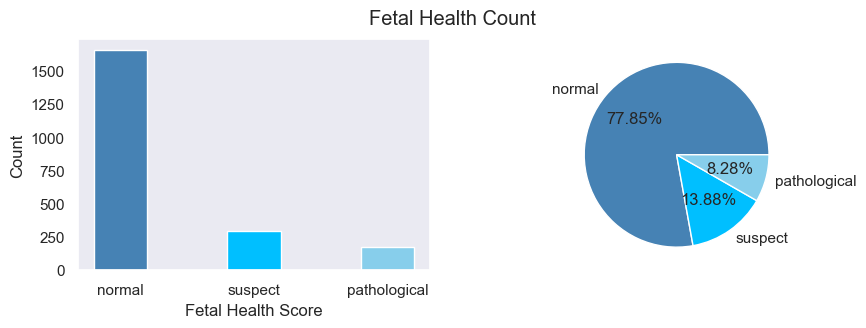

In [12]:
# Visual representation of count of each unique value of 'fetal_health'

sns.set(style = 'dark')
plt.figure(figsize=(10, 3))
plt.subplot(1,2,1)

fetal_bar_chart = plt.bar( ['normal', 'suspect', 'pathological'], data['fetal_health'].value_counts(), width = 0.4,
                          color = ['steelblue', 'deepskyblue', 'skyblue'])
plt.suptitle("Fetal Health Count")
plt.xlabel("Fetal Health Score")
plt.ylabel("Count")

plt.subplot(1,2, 2)
fetal_pie_chart = plt.pie(data['fetal_health'].value_counts(), labels = ['normal', 'suspect', 'pathological'], 
                          colors = ['steelblue', 'deepskyblue', 'skyblue'], autopct = '%.02f%%')

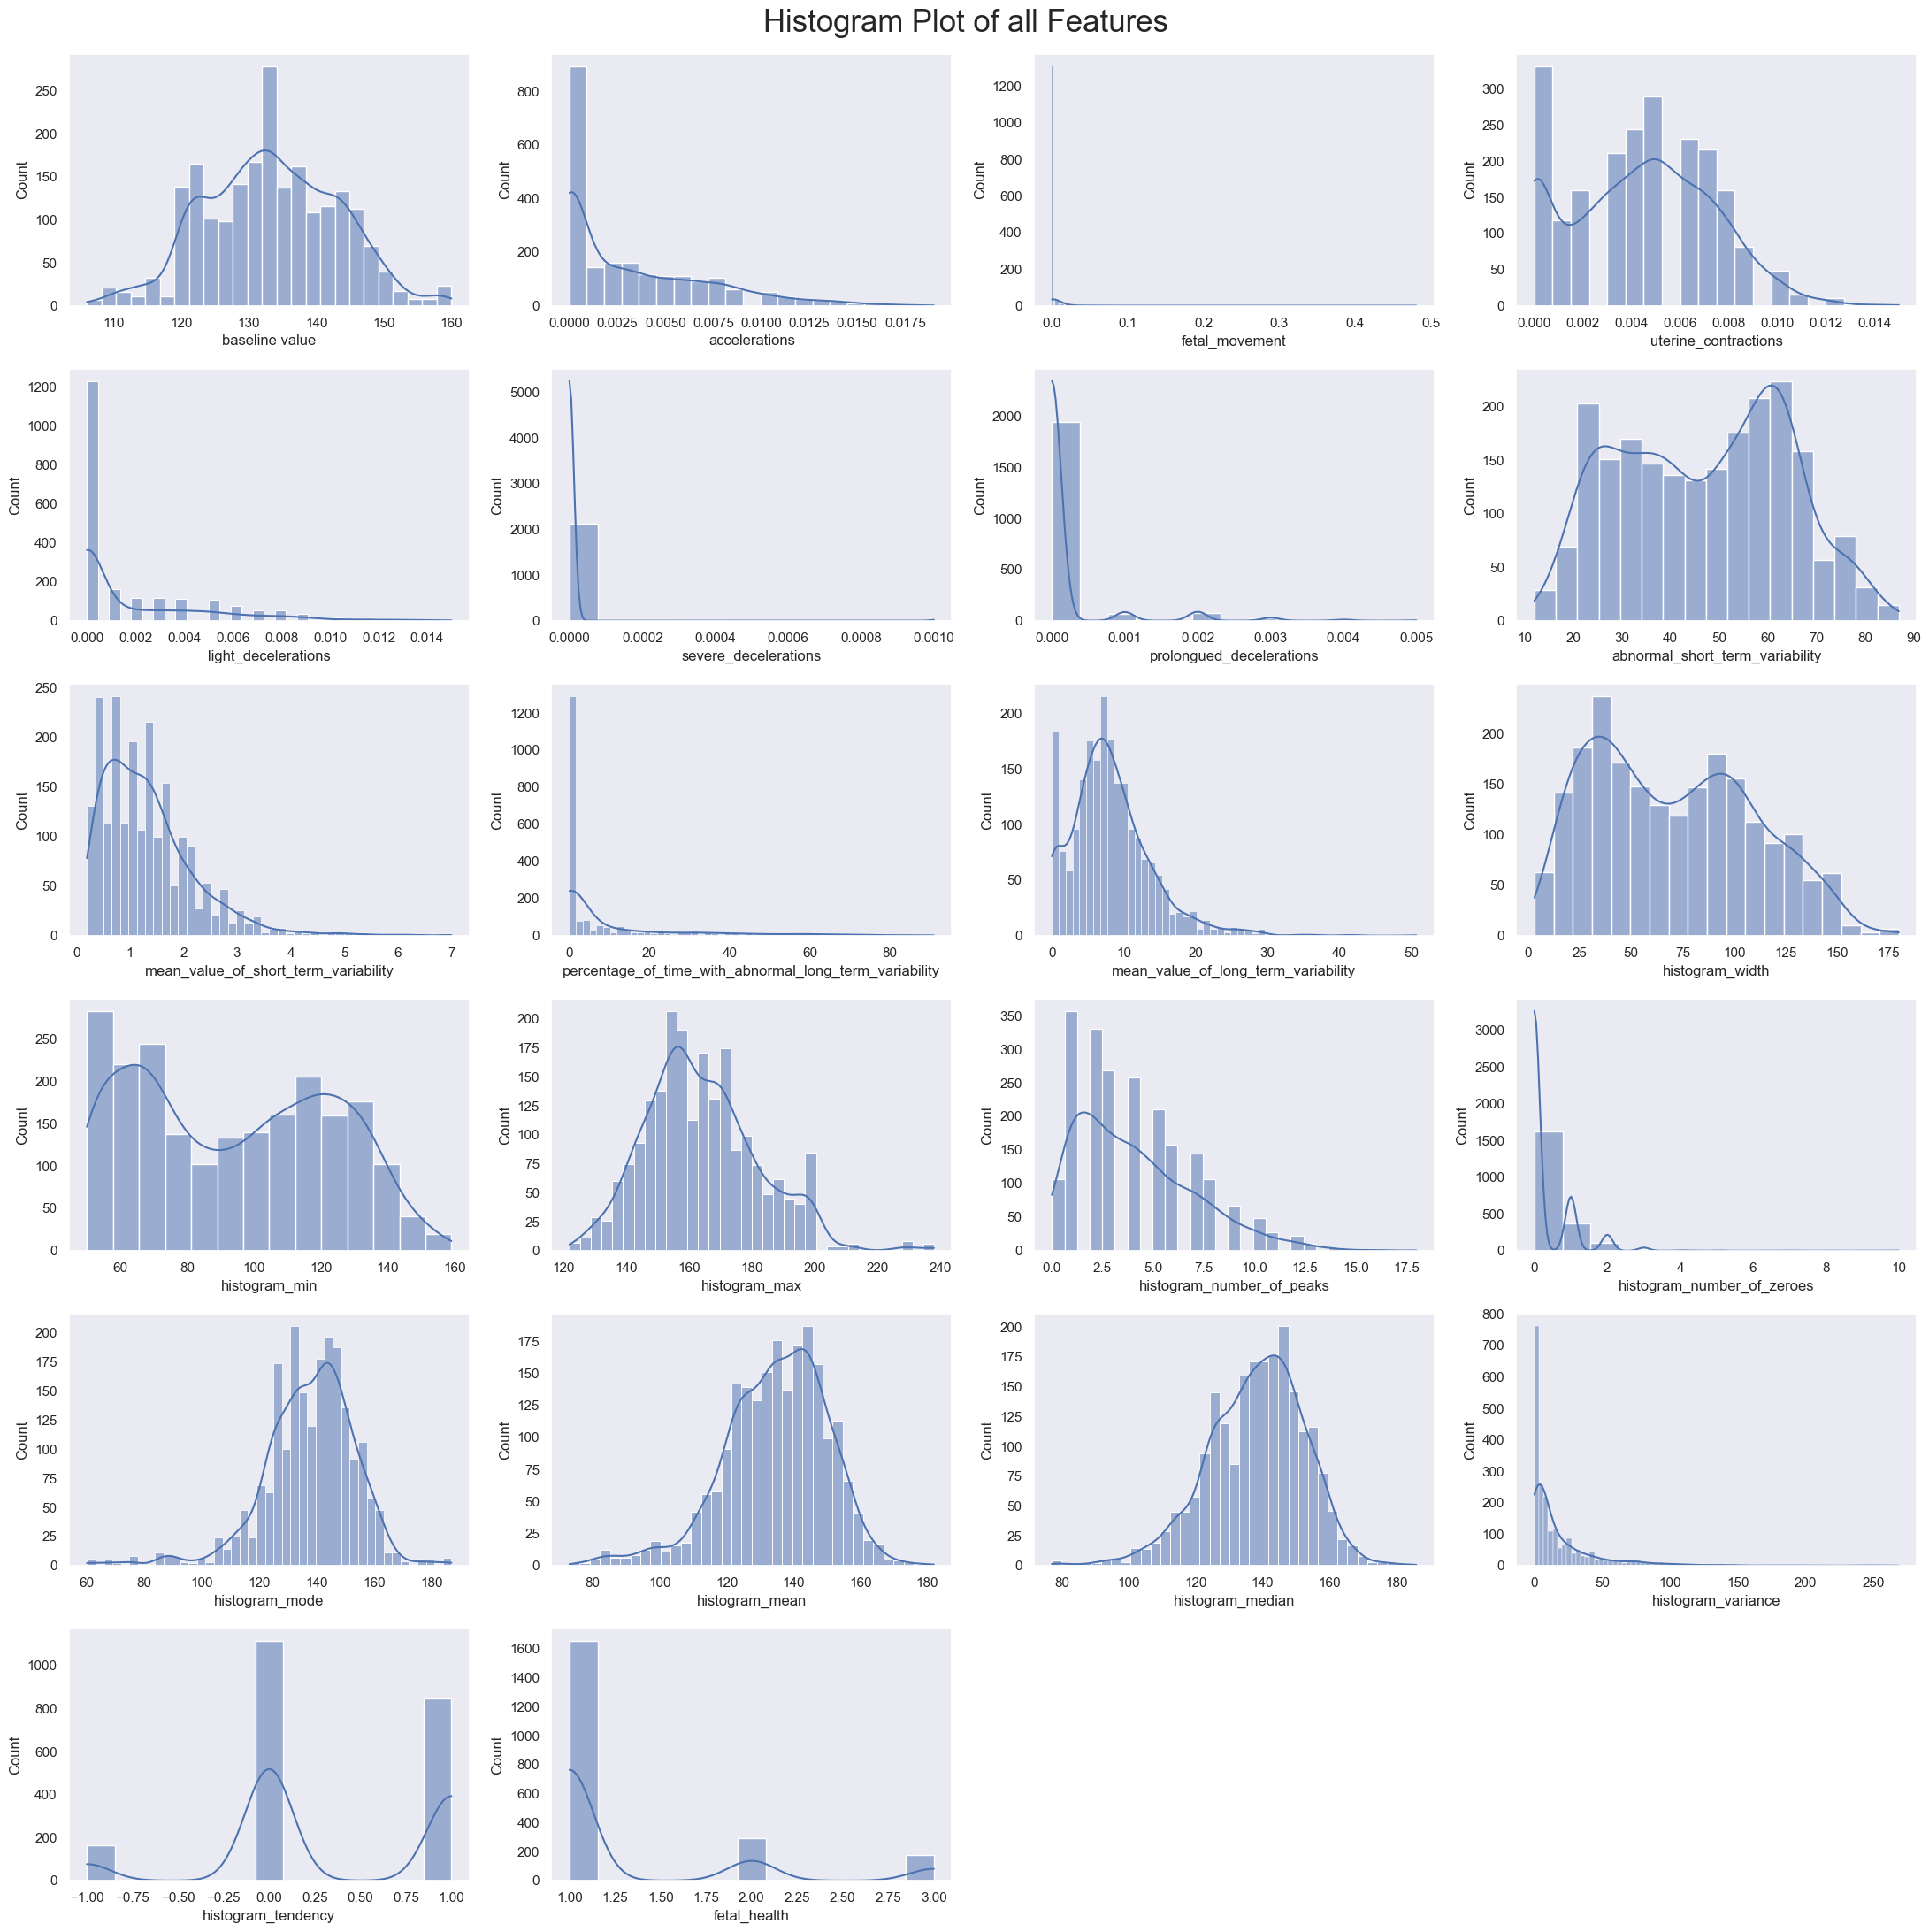

In [13]:
# Histogram Plot of each feature

col_lst = list(data.columns)
length = len(col_lst)

plt.figure(figsize = (22, 22))
plt.suptitle("Histogram Plot of all Features", fontsize = 25, verticalalignment = 'baseline')

for i in range(length):
    plt.subplot(6, 4, i+1)
    sns.histplot(data[col_lst[i]], kde = True)
    
plt.tight_layout()

In [14]:
# Mean and median of each feature

mean_lst = []
median_lst = [] 
for i in range(0, length):
    mean_lst.append(np.mean(data[col_lst[i]]))
    median_lst.append(np.median(data[col_lst[i]]))

<BarContainer object of 22 artists>

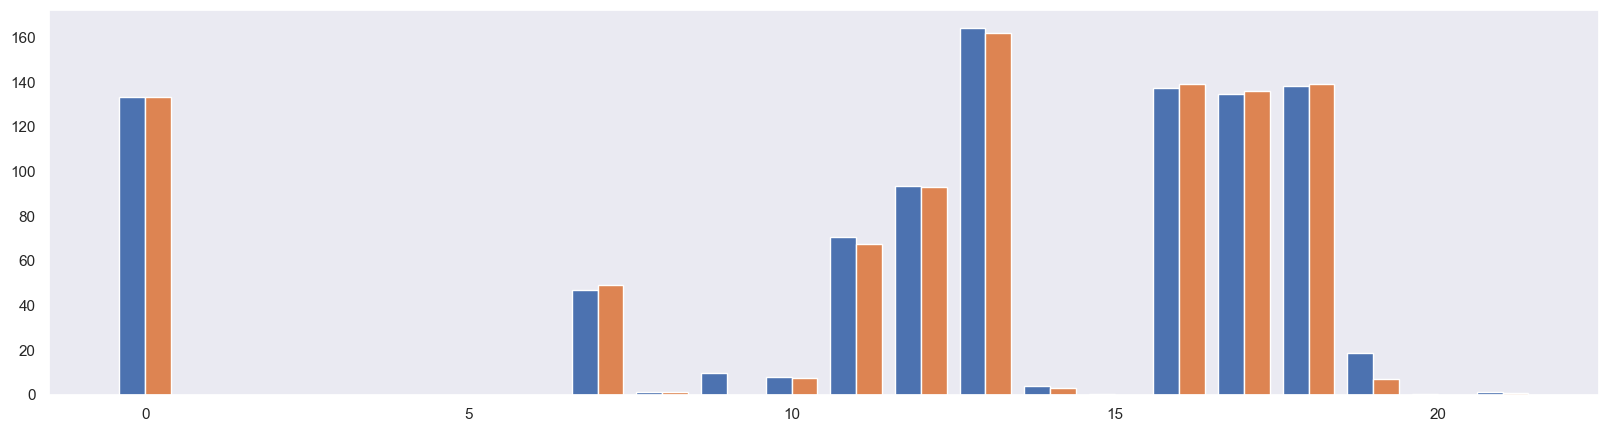

In [15]:
# Comparing mean and median for outlier check

x_axis = np.arange(len(mean_lst))
w = 0.4
plt.figure(figsize = (20,5))
plt.bar(x_axis-0.2, mean_lst, width=w, label = 'mean')
plt.bar(x_axis+0.2, median_lst, width=w, label = 'median')

In [16]:
# Since, the difference between two measures of Central Tendency is negligible thus no need to see for OUTLIERS

<AxesSubplot: >

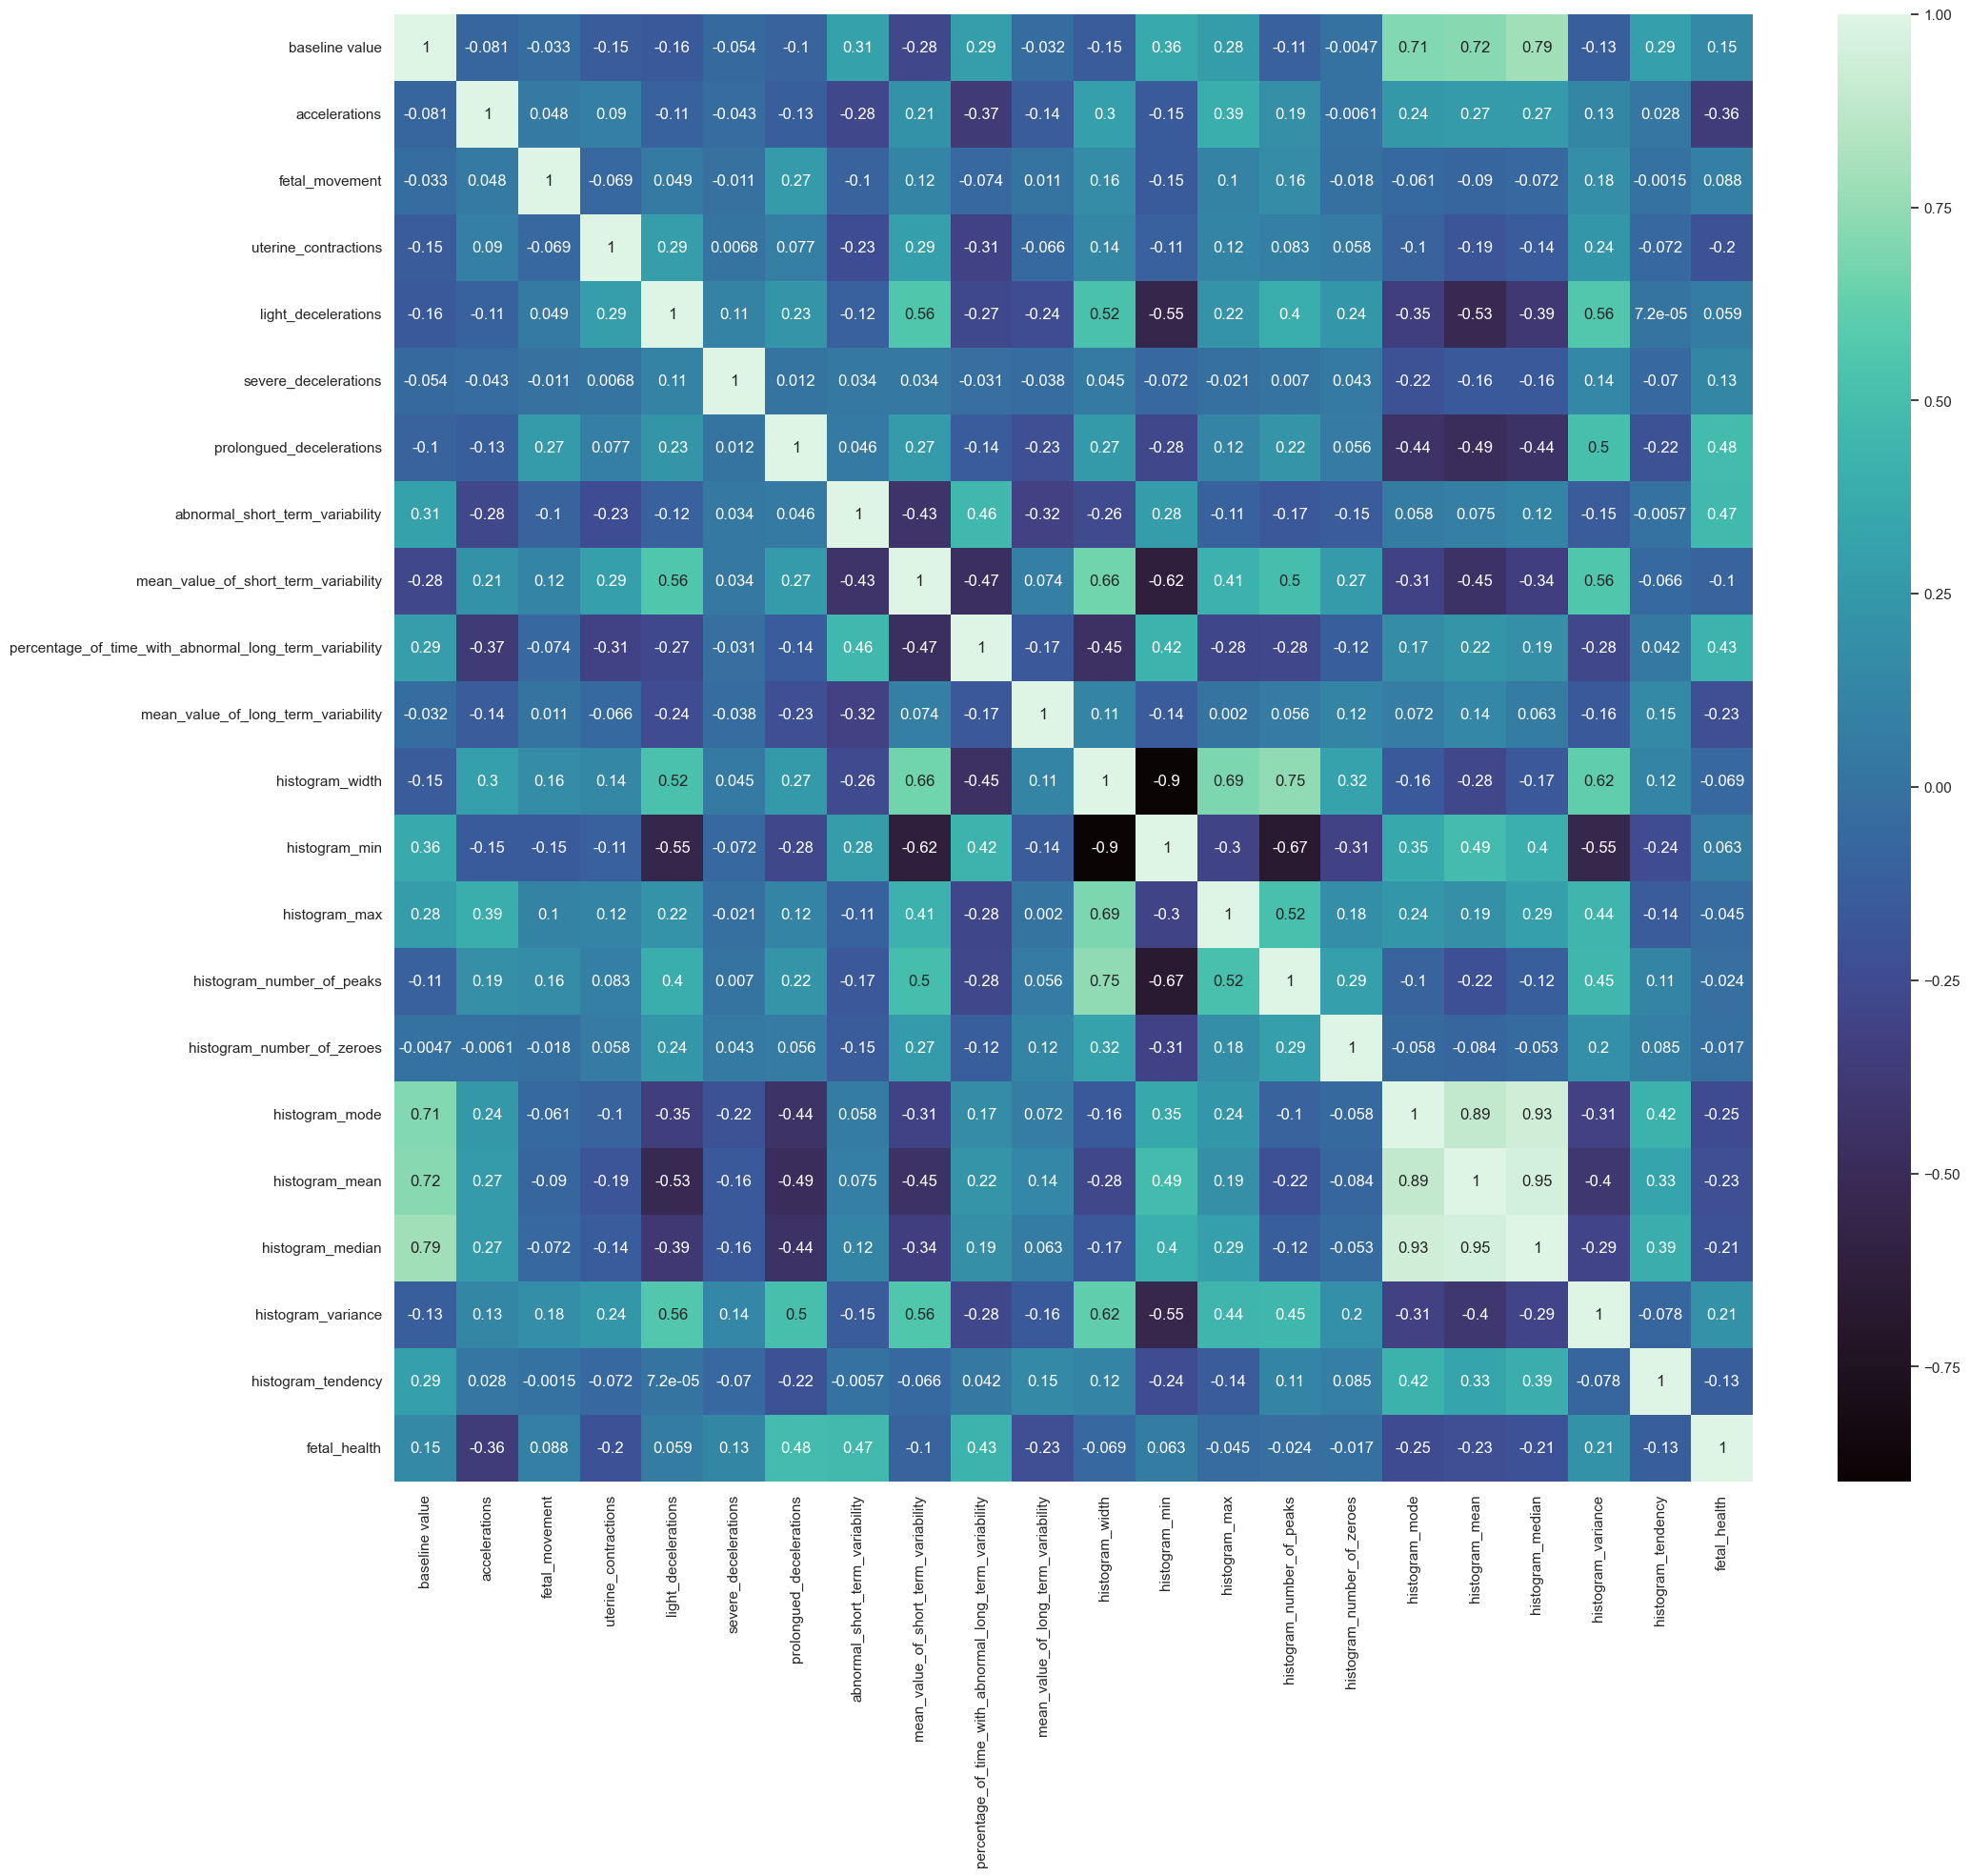

In [17]:
# Heatmap of correlation

plt.figure(figsize=(23, 20))
corr = data.corr()
sns.heatmap(corr, cmap='mako', annot=True)     # annot if true => write the value in each box

<AxesSubplot: >

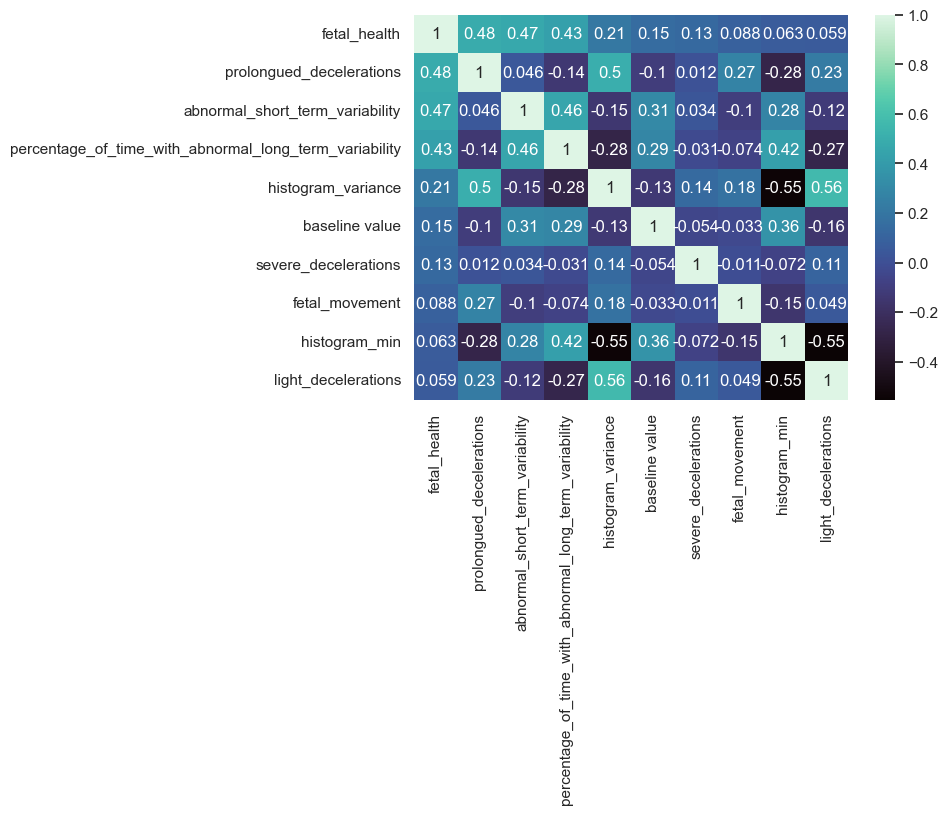

In [18]:
# Heatmap of top 10 features corrleated with target feature(fetal_health)

k = 10
cols = corr.nlargest(k, 'fetal_health')['fetal_health'].index

df = pd.DataFrame(data[map(lambda x:x, cols)])

new_corr = df.corr()

plt.figure(figsize = (7, 5))
sns.heatmap(new_corr, annot=True, cmap = 'mako')

## Train - Test Split and Pre processing

In [19]:
# Function to split and scale the data

def preprocess (df):
    df = df.copy()
    
    # Splitting the dataset in X and y
    y = df['fetal_health']
    X = df.drop('fetal_health', axis = 1)
    
    
    # Train Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, stratify = y, random_state=4)
    
    # Scale X
    scale_X = StandardScaler()
    scale_X.fit(X_train)
    X_train = pd.DataFrame(scale_X.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(scale_X.transform(X_test), index=X_test.index, columns=X_test.columns)
    
    
    return X_train, X_test, y_train, y_test

In [23]:
# Function calling to get the train - test data

X_train, X_test, y_train, y_test = preprocess(data)

In [21]:
# List of Models

models = [LogisticRegression(max_iter=500), KNeighborsClassifier(), 
          RandomForestClassifier(random_state=1), GradientBoostingClassifier()]

In [22]:
# Function to compare the accuracy score of each model based on above train test split

def compare_models():
    
    for model in models:
        
        # training
        model.fit(X_train, y_train)
        
        # prediction
        test_data_pred = model.predict(X_test)
        
        # accuracy score 
        accuracy = accuracy_score(y_test, test_data_pred)
        
        print(f'The accuracy score of {model} is = {accuracy}\n')

In [24]:
# Function calling to compare the models

compare_models()

The accuracy score of LogisticRegression(max_iter=500) is = 0.9059561128526645

The accuracy score of KNeighborsClassifier() is = 0.9153605015673981

The accuracy score of RandomForestClassifier(random_state=1) is = 0.9545454545454546

The accuracy score of GradientBoostingClassifier() is = 0.9592476489028213



## Cross Validation Score

In [25]:
# Function to compare CV_Score of each model

def compare_cv_score():
    
    for model in models:
        
        cv_score = cross_val_score(model, X_train, y_train, cv = 5)
        
        mean_accuracy = sum(cv_score)/len(cv_score)
        
        mean_accuracy = round(mean_accuracy*100, 2)
        
        print(f'cross_val_score : Mean Accuracy of {model} is = {mean_accuracy}\n')

In [26]:
# Funciton calling to compare CV_Score

compare_cv_score()

cross_val_score : Mean Accuracy of LogisticRegression(max_iter=500) is = 88.78

cross_val_score : Mean Accuracy of KNeighborsClassifier() is = 88.71

cross_val_score : Mean Accuracy of RandomForestClassifier(random_state=1) is = 93.35

cross_val_score : Mean Accuracy of GradientBoostingClassifier() is = 94.42



## Grid Search CV for hyperparameters tuning 

In [27]:
# Dictionary of hyperparameters of each model

model_hyperparameters = {
    'log_reg_hparameters' : {
        
        "C": [0.01, 0.1, 1, 10, 100],
        
    },
        
    'KNN_hparameters' : {
        
        "leaf_size": list(range(1,10)),
        "n_neighbors": list(range(1,10)),
        "p": [1,2]
        
    },
    
    'random_forest_hprameters' : {
        
        "min_samples_split": [2, 6, 20],
        "n_estimators" :[100,200,300,400]
        
    },
    
    'gbc_hparameters' : {
        
        "n_estimators": [100, 250, 500],
        "max_depth": [3, 5, 8]
        
    }
}

In [28]:
# List of keys of above dictionary

model_keys = list(model_hyperparameters.keys())

In [29]:
# Function to find the best hyperparameters set for each model

def ModelSelection(list_of_models, hyperparameter_dict):
    
    result = []
    
    i=0
    
    for model in list_of_models:
        
        key = model_keys[i]
        params = hyperparameter_dict[key]
        i+=1
        print(model)
        print(params)
        print("----------------------------------")
        
        object_of_gscv = GridSearchCV(model, params, cv=3)
        
        object_of_gscv.fit(X_train, y_train)
        
        result.append({
            'model_used' : model,
            'highest_score' : object_of_gscv.best_score_,
            'best_params' : object_of_gscv.best_params_   
        })
    
    result_df = pd.DataFrame(result, columns=['model_used', 'highest_score', 'best_params'])
    return result_df

In [30]:
# Function calling to the hyperparameters tuning

ModelSelection(models, model_hyperparameters)

LogisticRegression(max_iter=500)
{'C': [0.01, 0.1, 1, 10, 100]}
----------------------------------
KNeighborsClassifier()
{'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'p': [1, 2]}
----------------------------------
RandomForestClassifier(random_state=1)
{'min_samples_split': [2, 6, 20], 'n_estimators': [100, 200, 300, 400]}
----------------------------------
GradientBoostingClassifier()
{'n_estimators': [100, 250, 500], 'max_depth': [3, 5, 8]}
----------------------------------


,model_used,highest_score,best_params
0,LogisticRegression(max_iter=500),0.896505,{'C': 10}
1,KNeighborsClassifier(),0.899866,"{'leaf_size': 1, 'n_neighbors': 1, 'p': 1}"
2,"(DecisionTreeClassifier(max_features='sqrt', r...",0.932796,"{'min_samples_split': 2, 'n_estimators': 200}"
3,([DecisionTreeRegressor(criterion='friedman_ms...,0.944220,"{'max_depth': 5, 'n_estimators': 100}"


## Model Performance Analysis

### Logistic Regression

90.75 %

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         1.0       0.95      0.96      0.96       497
         2.0       0.69      0.64      0.66        88
         3.0       0.83      0.85      0.84        53

    accuracy                           0.91       638
   macro avg       0.82      0.82      0.82       638
weighted avg       0.90      0.91      0.91       638



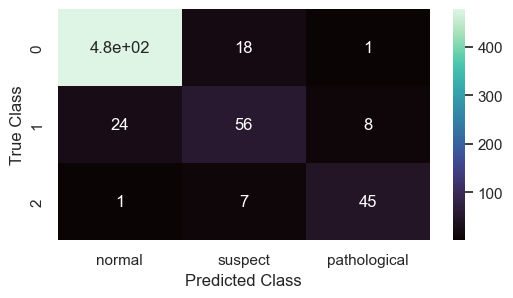

In [31]:
# Accuracy Score by using best set of hyperparameters
logistic_reg = LogisticRegression(C=10, max_iter=500)
logistic_reg_learn = logistic_reg.fit(X_train, y_train)
logistic_reg_predi = logistic_reg_learn.predict(X_test)
print(round(accuracy_score(y_test, logistic_reg_predi)*100, 2), '%')

# Confusion Matrix Heatmap
plt.figure(figsize=(6, 3))
cf_matrix = sns.heatmap(confusion_matrix(y_test, logistic_reg_predi), cmap = 'mako', annot=True)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
cf_matrix = cf_matrix.set_xticklabels(['normal', 'suspect', 'pathological'])

# Classification Report
print('\nCLASSIFICATION REPORT\n')
print(classification_report(y_test, logistic_reg_predi))

### KNN

91.85 %

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         1.0       0.96      0.94      0.95       497
         2.0       0.72      0.75      0.73        88
         3.0       0.88      0.96      0.92        53

    accuracy                           0.92       638
   macro avg       0.85      0.89      0.87       638
weighted avg       0.92      0.92      0.92       638



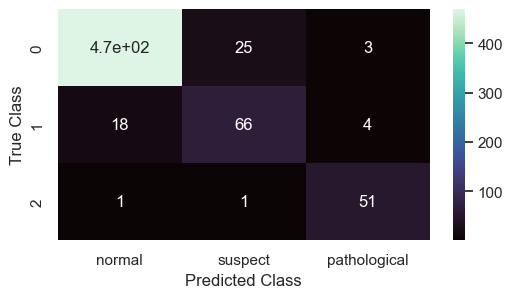

In [32]:
# Accuracy Score by using best set of hyperparameters
knn = KNeighborsClassifier(leaf_size=1, n_neighbors=1, p=1)
knn_learn = knn.fit(X_train, y_train)
knn_predi = knn_learn.predict(X_test)
print(round(accuracy_score(y_test, knn_predi)*100, 2), '%')

# Confusion Matrix Heatmap
plt.figure(figsize=(6, 3))
cf_matrix = sns.heatmap(confusion_matrix(y_test, knn_predi), cmap = 'mako', annot=True)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
cf_matrix = cf_matrix.set_xticklabels(['normal', 'suspect', 'pathological'])

# Classification Report
print('\nCLASSIFICATION REPORT\n')
print(classification_report(y_test, knn_predi))

### Random Forest

95.3 %

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         1.0       0.96      0.99      0.97       497
         2.0       0.90      0.75      0.82        88
         3.0       0.93      0.98      0.95        53

    accuracy                           0.95       638
   macro avg       0.93      0.91      0.92       638
weighted avg       0.95      0.95      0.95       638



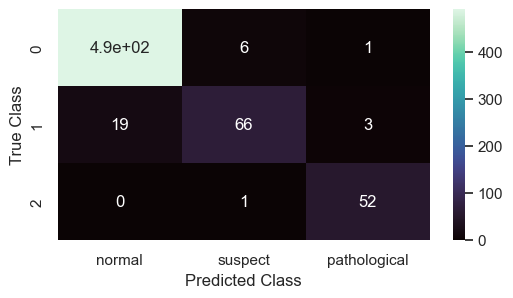

In [33]:
# Accuracy Score by using best set of hyperparameters
random_forest = RandomForestClassifier(min_samples_split=2, n_estimators=200, random_state=1)
random_forest_learn = random_forest.fit(X_train, y_train)
random_forest_predi = random_forest_learn.predict(X_test)
print(round(accuracy_score(y_test, random_forest_predi)*100, 2), '%')

# Confusion Matrix Heatmap
plt.figure(figsize=(6, 3))
cf_matrix = sns.heatmap(confusion_matrix(y_test, random_forest_predi), cmap = 'mako', annot=True)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
cf_matrix = cf_matrix.set_xticklabels(['normal', 'suspect', 'pathological'])

# Classification Report
print('\nCLASSIFICATION REPORT\n')
print(classification_report(y_test, random_forest_predi))

### Gradient Boosting Classifier

95.3 %

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         1.0       0.97      0.98      0.97       497
         2.0       0.90      0.81      0.85        88
         3.0       0.90      0.98      0.94        53

    accuracy                           0.95       638
   macro avg       0.92      0.92      0.92       638
weighted avg       0.95      0.95      0.95       638



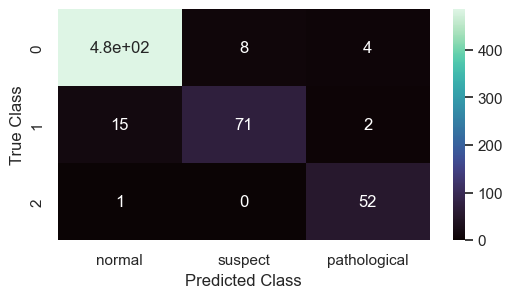

In [34]:
# Accuracy Score by using best set of hyperparameters
gbc = GradientBoostingClassifier(max_depth=5, n_estimators=250)
gbc_learn = gbc.fit(X_train, y_train)
gbc_predi = gbc_learn.predict(X_test)
print(round(accuracy_score(y_test, gbc_predi)*100, 2), '%')

# Confusion Matrix Heatmap
plt.figure(figsize=(6, 3))
cf_matrix = sns.heatmap(confusion_matrix(y_test, gbc_predi), cmap = 'mako', annot=True)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
cf_matrix = cf_matrix.set_xticklabels(['normal', 'suspect', 'pathological'])

# Classification Report
print('\nCLASSIFICATION REPORT\n')
print(classification_report(y_test, gbc_predi))

## Plot the Learning Curve

In [35]:
# Function to plot the Learning Curve

def plot_learning_curve(estimator, title, x, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
        
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, x, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="#80CBC4",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="#00897B",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

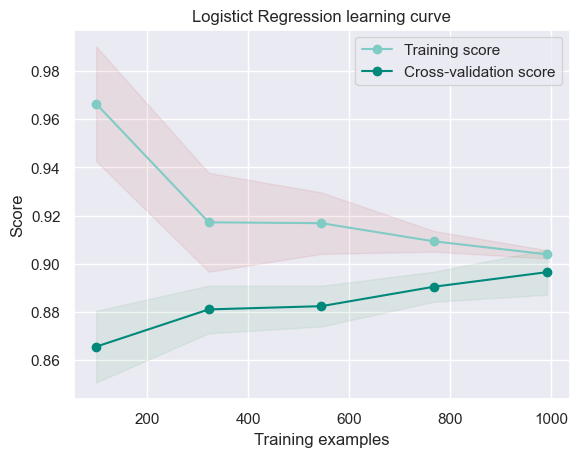

In [36]:
# Logistic Regression

GridSearchCV_LR = GridSearchCV(estimator=LogisticRegression(max_iter=500), 
                               param_grid=model_hyperparameters['log_reg_hparameters'], cv=3)
GridSearchCV_LR.fit(X_train, y_train)



plot_learning_curve(GridSearchCV_LR.best_estimator_, 
                    title = "Logistict Regression learning curve", x = X_train, y = y_train, cv = 3);

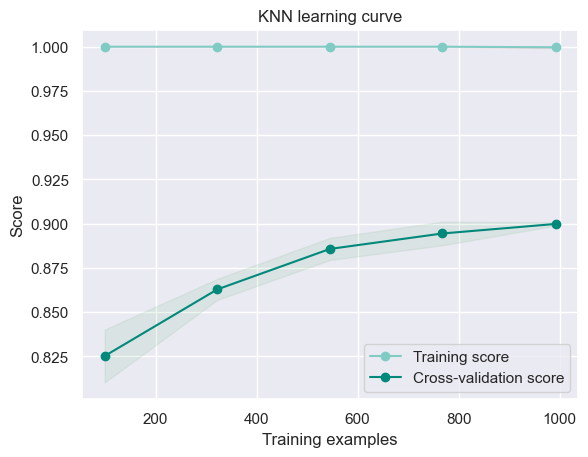

In [37]:
# KNN

GridSearchCV_KNN = GridSearchCV(estimator=KNeighborsClassifier(), 
                                param_grid=model_hyperparameters['KNN_hparameters'], cv=3)
GridSearchCV_KNN.fit(X_train, y_train)


plot_learning_curve(GridSearchCV_KNN.best_estimator_, title = "KNN learning curve", x = X_train, y = y_train, cv = 3);

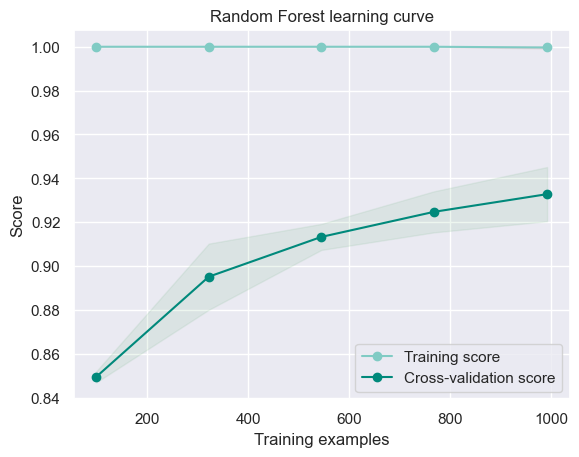

In [38]:
# Random Forest

GridSearchCV_RandomForest = GridSearchCV(estimator=RandomForestClassifier(random_state=1), 
                                         param_grid=model_hyperparameters['random_forest_hprameters'], cv=3)
GridSearchCV_RandomForest.fit(X_train, y_train)


plot_learning_curve(GridSearchCV_RandomForest.best_estimator_, 
                    title = "Random Forest learning curve", x = X_train, y = y_train, cv = 3);

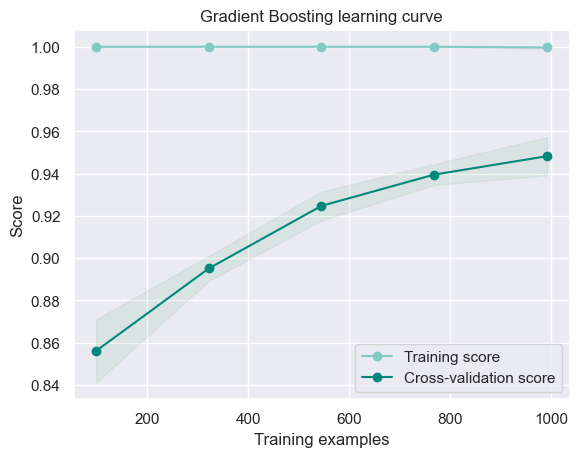

In [39]:
# Gradient Boosting Classifier

GridSearchCV_GBC = GridSearchCV(estimator=GradientBoostingClassifier(), 
                                         param_grid=model_hyperparameters['gbc_hparameters'], cv=3)
GridSearchCV_GBC.fit(X_train, y_train)


plot_learning_curve(GridSearchCV_GBC.best_estimator_, 
                    title = "Gradient Boosting learning curve", x = X_train, y = y_train, cv = 3);

## Building a Predictive System

In [60]:
input_data = (134, 0.001, 0, 0.013, 0.008, 0, 0.003, 29, 6.3, 0, 0, 150, 50, 200, 6, 3, 71, 107, 106, 215, 0, 3)

# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# turn the array into a data frame
temp = pd.DataFrame(input_data_reshaped, columns=data.columns)
temp = temp.drop('fetal_health', axis = 1)

# Fitting the best model 
fitted_model = GradientBoostingClassifier().fit(X_train, y_train)

# Predicting the Fetal Condition
prediction = fitted_model.predict(temp)


if(prediction[0] == 0):
    print("Fetal health is NORMAL")
elif(prediction[0] == 1):
    print("Fetal health is SUSPECT")
else:
    print("Fetal health is PATHOLOGICAL")

Fetal health is PATHOLOGICAL
